In [1]:
import pandas as pd

# 데이터셋 불러오기
medical_df = pd.read_csv('./datasets/medical_dataset.csv')
lifestyle_df = pd.read_csv('./datasets/lifestyle_dataset.csv')

# 두 데이터셋 합치기
heart_df = pd.concat([medical_df, lifestyle_df], axis=1)
heart_df

,BMI,Stroke,PhysicalHealth,AgeCategory,MentalHealth,DiffWalking,Diabetic,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,Sex,PatientID,Smoking,AlcoholDrinking,PhysicalActivity,SleepTime,Race,PatientID
0,16.60,No,3.0,55-59,30.0,No,Yes,Very good,Yes,No,Yes,No,Female,367841,Yes,No,Yes,5.0,White,367841
1,20.34,Yes,0.0,80 or older,0.0,No,No,Very good,No,No,No,No,Female,375880,No,No,Yes,7.0,White,375880
2,26.58,No,20.0,65-69,30.0,No,Yes,Fair,Yes,No,No,No,Male,235382,Yes,No,Yes,8.0,White,235382
3,24.21,No,0.0,75-79,0.0,No,No,Good,No,No,Yes,No,Female,267437,No,No,No,6.0,White,267437
4,23.71,No,28.0,40-44,0.0,Yes,No,Very good,No,No,No,No,Female,332825,No,No,Yes,8.0,White,332825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,No,7.0,60-64,0.0,Yes,Yes,Fair,Yes,No,No,Yes,Male,145205,Yes,No,No,6.0,Hispanic,145205
319791,29.84,No,0.0,35-39,0.0,No,No,Very good,Yes,No,No,No,Male,409347,Yes,No,Yes,5.0,Hispanic,409347
319792,24.24,No,0.0,45-49,0.0,No,No,Good,No,No,No,No,Female,335808,No,No,Yes,6.0,Hispanic,335808
319793,32.81,No,0.0,25-29,0.0,No,No,Good,No,No,No,No,Female,414151,No,No,No,12.0,Hispanic,414151


In [2]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BMI             319795 non-null  float64
 1   Stroke          319795 non-null  object 
 2   PhysicalHealth  319795 non-null  float64
 3   AgeCategory     319795 non-null  object 
 4   MentalHealth    319795 non-null  float64
 5   DiffWalking     319795 non-null  object 
 6   Diabetic        319795 non-null  object 
 7   GenHealth       319795 non-null  object 
 8   Asthma          319795 non-null  object 
 9   KidneyDisease   319795 non-null  object 
 10  SkinCancer      319795 non-null  object 
 11  HeartDisease    319795 non-null  object 
 12  Sex             319795 non-null  object 
 13  PatientID       319795 non-null  int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 34.2+ MB


In [3]:
lifestyle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Smoking           319795 non-null  object 
 1   AlcoholDrinking   319795 non-null  object 
 2   PhysicalActivity  319795 non-null  object 
 3   SleepTime         319795 non-null  float64
 4   Race              319795 non-null  object 
 5   PatientID         319795 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 14.6+ MB


In [4]:
import pandas as pd

# 결측치 확인 
print(heart_df.isna().sum())

# 중복행 확인
print(heart_df.duplicated().sum())

BMI                 0
Stroke              0
PhysicalHealth      0
AgeCategory         0
MentalHealth        0
DiffWalking         0
Diabetic            0
GenHealth           0
Asthma              0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
Sex                 0
PatientID           0
Smoking             0
AlcoholDrinking     0
PhysicalActivity    0
SleepTime           0
Race                0
PatientID           0
dtype: int64
0


In [5]:
import pandas as pd

heart_disease_counts = heart_df['HeartDisease'].value_counts()

# 결과 출력
print(heart_disease_counts)


HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [6]:
# 언더 샘플링
yes_samples = heart_df[heart_df['HeartDisease'] == 'Yes'].sample(n=3000, random_state=42)
no_samples = heart_df[heart_df['HeartDisease'] == 'No'].sample(n=3000, random_state=42)

# 랜덤 샘플링한 데이터를 하나의 데이터프레임으로 합치기
heart_df = pd.concat([yes_samples, no_samples])

# 결과 출력
heart_disease_counts = heart_df['HeartDisease'].value_counts()

# 결과 출력
print(heart_disease_counts)

HeartDisease
Yes    3000
No     3000
Name: count, dtype: int64


In [7]:
heart_df = heart_df.reset_index(drop=True)
heart_df

,BMI,Stroke,PhysicalHealth,AgeCategory,MentalHealth,DiffWalking,Diabetic,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,Sex,PatientID,Smoking,AlcoholDrinking,PhysicalActivity,SleepTime,Race,PatientID
0,25.61,Yes,30.0,50-54,30.0,No,No,Poor,No,No,Yes,Yes,Female,226509,Yes,No,Yes,3.0,Asian,226509
1,27.12,No,3.0,75-79,0.0,No,"No, borderline diabetes",Good,No,No,No,Yes,Male,342570,Yes,No,Yes,7.0,White,342570
2,30.90,Yes,4.0,70-74,30.0,Yes,Yes,Fair,Yes,Yes,No,Yes,Female,262039,No,No,No,7.0,White,262039
3,27.46,No,0.0,70-74,0.0,No,Yes,Excellent,No,No,No,Yes,Female,183631,No,No,Yes,8.0,White,183631
4,26.63,No,0.0,80 or older,0.0,No,No,Excellent,No,No,Yes,Yes,Male,211007,Yes,No,No,5.0,White,211007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,23.42,No,4.0,18-24,0.0,No,No,Excellent,No,No,No,No,Male,372542,Yes,No,Yes,8.0,White,372542
5996,28.72,No,0.0,65-69,0.0,No,No,Very good,No,No,No,No,Female,128219,No,No,Yes,7.0,White,128219
5997,41.60,No,0.0,35-39,0.0,No,No,Very good,Yes,No,No,No,Male,326022,Yes,No,Yes,6.0,White,326022
5998,26.08,No,0.0,30-34,5.0,No,No,Very good,No,No,No,No,Male,282170,Yes,No,Yes,10.0,White,282170


In [8]:
column_counts = heart_df.nunique()
column_counts

BMI                 1279
Stroke                 2
PhysicalHealth        31
AgeCategory           13
MentalHealth          28
DiffWalking            2
Diabetic               4
GenHealth              5
Asthma                 2
KidneyDisease          2
SkinCancer             2
HeartDisease           2
Sex                    2
PatientID           6000
Smoking                2
AlcoholDrinking        2
PhysicalActivity       2
SleepTime             20
Race                   6
PatientID           6000
dtype: int64

In [9]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               6000 non-null   float64
 1   Stroke            6000 non-null   object 
 2   PhysicalHealth    6000 non-null   float64
 3   AgeCategory       6000 non-null   object 
 4   MentalHealth      6000 non-null   float64
 5   DiffWalking       6000 non-null   object 
 6   Diabetic          6000 non-null   object 
 7   GenHealth         6000 non-null   object 
 8   Asthma            6000 non-null   object 
 9   KidneyDisease     6000 non-null   object 
 10  SkinCancer        6000 non-null   object 
 11  HeartDisease      6000 non-null   object 
 12  Sex               6000 non-null   object 
 13  PatientID         6000 non-null   int64  
 14  Smoking           6000 non-null   object 
 15  AlcoholDrinking   6000 non-null   object 
 16  PhysicalActivity  6000 non-null   object 


In [10]:
from sklearn.preprocessing import LabelEncoder

# HeartDisease 데이터프레임에서 객체 타입 컬럼 선택
obj_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# 레이블 인코더 초기화
encoders = []

# 레이블 인코딩 수행
for column in obj_columns:
    encoder = LabelEncoder()
    heart_df[column] = encoder.fit_transform(heart_df[column].tolist())
    encoders.append(encoder)
    print(encoder.classes_)


['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
['No' 'Yes']
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


<Axes: >

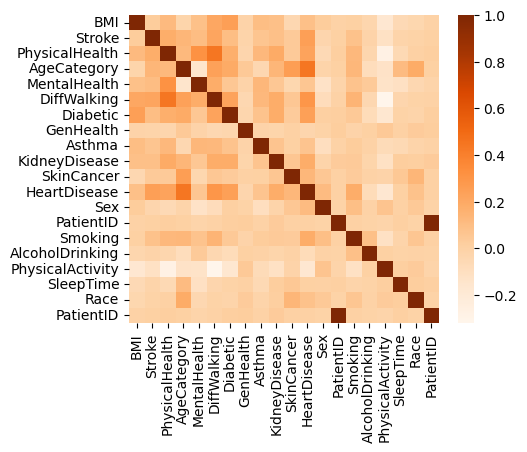

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))
correlation_matrix = heart_df.corr()
sns.heatmap(correlation_matrix, cmap="Oranges")

array([[<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'PhysicalHealth'}>,
        <Axes: title={'center': 'AgeCategory'}>,
        <Axes: title={'center': 'MentalHealth'}>],
       [<Axes: title={'center': 'DiffWalking'}>,
        <Axes: title={'center': 'Diabetic'}>,
        <Axes: title={'center': 'GenHealth'}>,
        <Axes: title={'center': 'Asthma'}>],
       [<Axes: title={'center': 'KidneyDisease'}>,
        <Axes: title={'center': 'SkinCancer'}>,
        <Axes: title={'center': 'HeartDisease'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'PatientID'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'AlcoholDrinking'}>,
        <Axes: title={'center': 'PhysicalActivity'}>],
       [<Axes: title={'center': 'SleepTime'}>,
        <Axes: title={'center': 'Race'}>,
        <Axes: title={'center': 'PatientID'}>, <Axes: >]], dtype=object)

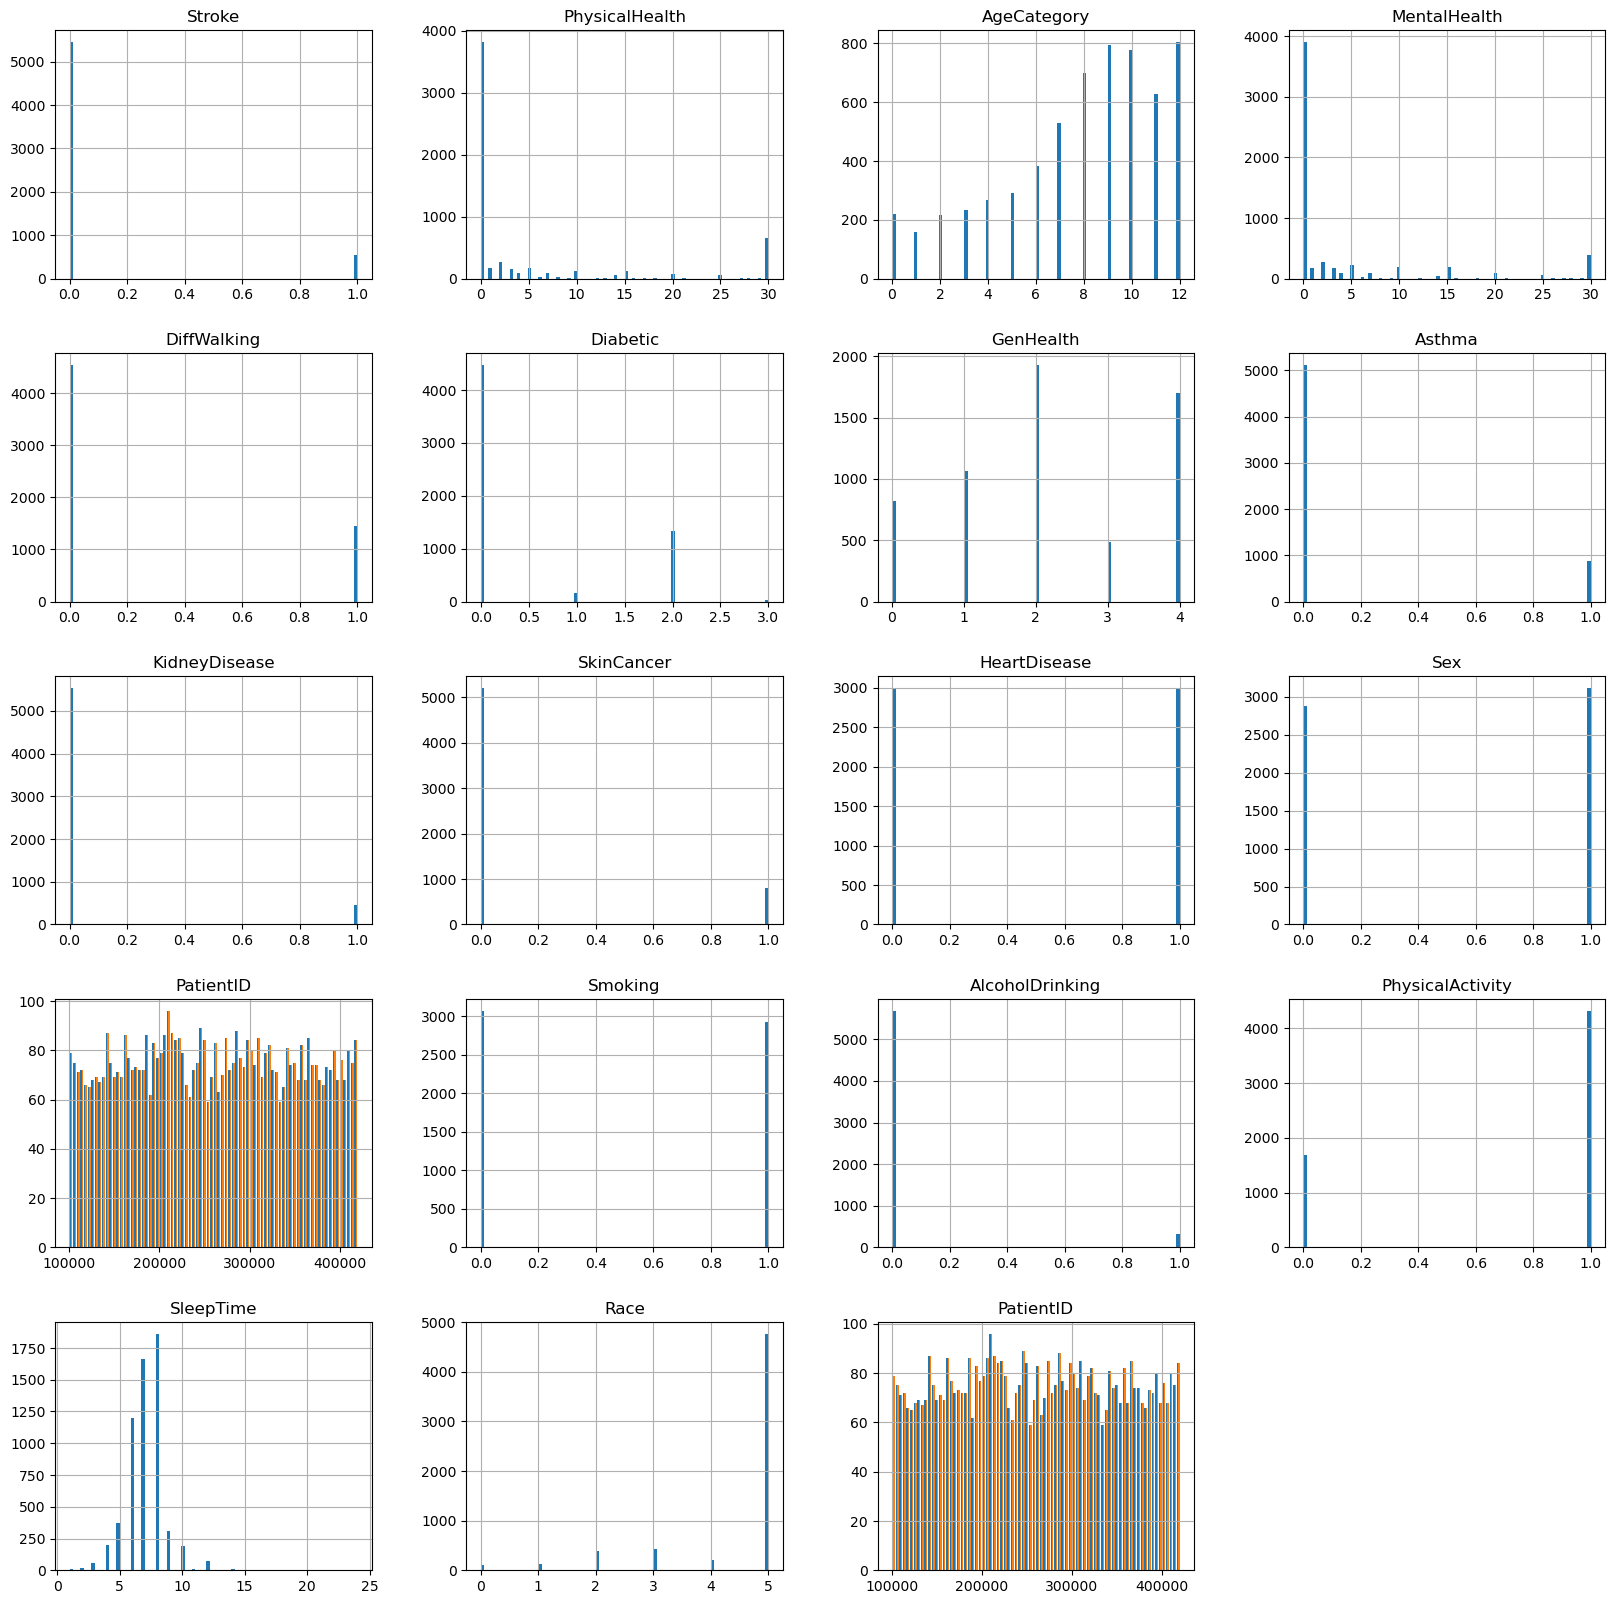

In [12]:
heart_df.iloc[:, 1:].hist(figsize=(20, 20), bins=80)

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [6, 12, 18, 24],
    'min_samples_leaf': [4, 8, 16]
}

random_forest_classifier = RandomForestClassifier(n_estimators=100)

features, targets = heart_df.drop('HeartDisease', axis=1), heart_df.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.3)

grid_random_forest = GridSearchCV(random_forest_classifier, param_grid=param_grid, cv=10, n_jobs=4)

grid_random_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [4, 8, 16],
                         'min_samples_split': [6, 12, 18, 24]})

In [14]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_random_forest.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
18,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.768095,1,0.761905,0.790476,0.754762
22,"{'max_depth': 6, 'min_samples_leaf': 16, 'min_...",0.767857,2,0.778571,0.802381,0.761905
29,"{'max_depth': 8, 'min_samples_leaf': 8, 'min_s...",0.767143,3,0.783333,0.790476,0.759524
30,"{'max_depth': 8, 'min_samples_leaf': 8, 'min_s...",0.766905,4,0.764286,0.795238,0.759524
25,"{'max_depth': 8, 'min_samples_leaf': 4, 'min_s...",0.766905,4,0.778571,0.785714,0.752381
36,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.766667,6,0.778571,0.790476,0.766667
31,"{'max_depth': 8, 'min_samples_leaf': 8, 'min_s...",0.766667,6,0.773810,0.792857,0.766667
13,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",0.766429,8,0.769048,0.792857,0.769048
45,"{'max_depth': 10, 'min_samples_leaf': 16, 'min...",0.766429,9,0.776190,0.788095,0.761905
41,"{'max_depth': 10, 'min_samples_leaf': 8, 'min_...",0.766429,9,0.788095,0.788095,0.759524


In [15]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[624 276]
 [160 740]]
정확도: 0.7578, 정밀도: 0.7283, 재현율: 0.8222, F1:0.7724, AUC:0.7578
###########################################################################


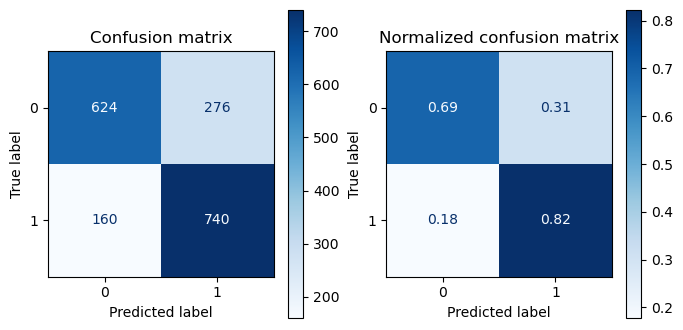

In [16]:
prediction = grid_random_forest.predict(X_test)
get_evaluation(y_test, prediction, grid_random_forest, X_test)

In [17]:
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [18]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve

prediction_prob = grid_random_forest.predict_proba(X_test)
prediction_prob_class1 = prediction_prob[:, 1].reshape(-1, 1)
precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob_class1)
get_evaluation_by_thresholds(y_test, prediction_prob_class1, thresholds)


임곗값: 0.0856005701385972
오차 행렬
[[  1 899]
 [  0 900]]
정확도: 0.5006, 정밀도: 0.5003, 재현율: 1.0000, F1:0.6669, AUC:0.5006
###########################################################################
임곗값: 0.0856786877689895
오차 행렬
[[  2 898]
 [  0 900]]
정확도: 0.5011, 정밀도: 0.5006, 재현율: 1.0000, F1:0.6672, AUC:0.5011
###########################################################################
임곗값: 0.08592672769026899
오차 행렬
[[  3 897]
 [  0 900]]
정확도: 0.5017, 정밀도: 0.5008, 재현율: 1.0000, F1:0.6674, AUC:0.5017
###########################################################################
임곗값: 0.0877432564886451
오차 행렬
[[  4 896]
 [  0 900]]
정확도: 0.5022, 정밀도: 0.5011, 재현율: 1.0000, F1:0.6677, AUC:0.5022
###########################################################################
임곗값: 0.08820275620931389
오차 행렬
[[  5 895]
 [  0 900]]
정확도: 0.5028, 정밀도: 0.5014, 재현율: 1.0000, F1:0.6679, AUC:0.5028
###########################################################################
임곗값: 0.08929616522884165
오차 행렬
[[  6 894]
 [  0 

오차 행렬
[[ 46 854]
 [  3 897]]
정확도: 0.5239, 정밀도: 0.5123, 재현율: 0.9967, F1:0.6767, AUC:0.5239
###########################################################################
임곗값: 0.11465631864006708
오차 행렬
[[ 47 853]
 [  3 897]]
정확도: 0.5244, 정밀도: 0.5126, 재현율: 0.9967, F1:0.6770, AUC:0.5244
###########################################################################
임곗값: 0.11511171407950149
오차 행렬
[[ 48 852]
 [  3 897]]
정확도: 0.5250, 정밀도: 0.5129, 재현율: 0.9967, F1:0.6772, AUC:0.5250
###########################################################################
임곗값: 0.11516498280730281
오차 행렬
[[ 49 851]
 [  3 897]]
정확도: 0.5256, 정밀도: 0.5132, 재현율: 0.9967, F1:0.6775, AUC:0.5256
###########################################################################
임곗값: 0.11543296611379654
오차 행렬
[[ 50 850]
 [  3 897]]
정확도: 0.5261, 정밀도: 0.5135, 재현율: 0.9967, F1:0.6777, AUC:0.5261
###########################################################################
임곗값: 0.11562945635931404
오차 행렬
[[ 51 849]
 [  3 897]]
정확도: 0.5267, 정밀도

오차 행렬
[[ 95 805]
 [  3 897]]
정확도: 0.5511, 정밀도: 0.5270, 재현율: 0.9967, F1:0.6895, AUC:0.5511
###########################################################################
임곗값: 0.12751612754195013
오차 행렬
[[ 96 804]
 [  3 897]]
정확도: 0.5517, 정밀도: 0.5273, 재현율: 0.9967, F1:0.6897, AUC:0.5517
###########################################################################
임곗값: 0.12820018081774415
오차 행렬
[[ 97 803]
 [  3 897]]
정확도: 0.5522, 정밀도: 0.5276, 재현율: 0.9967, F1:0.6900, AUC:0.5522
###########################################################################
임곗값: 0.1289293565812216
오차 행렬
[[ 98 802]
 [  3 897]]
정확도: 0.5528, 정밀도: 0.5280, 재현율: 0.9967, F1:0.6903, AUC:0.5528
###########################################################################
임곗값: 0.12912463601048765
오차 행렬
[[ 99 801]
 [  3 897]]
정확도: 0.5533, 정밀도: 0.5283, 재현율: 0.9967, F1:0.6905, AUC:0.5533
###########################################################################
임곗값: 0.1298342846420842
오차 행렬
[[100 800]
 [  3 897]]
정확도: 0.5539, 정밀도: 

오차 행렬
[[151 749]
 [  6 894]]
정확도: 0.5806, 정밀도: 0.5441, 재현율: 0.9933, F1:0.7031, AUC:0.5806
###########################################################################
임곗값: 0.14715591650265636
오차 행렬
[[152 748]
 [  6 894]]
정확도: 0.5811, 정밀도: 0.5445, 재현율: 0.9933, F1:0.7034, AUC:0.5811
###########################################################################
임곗값: 0.14741809397642075
오차 행렬
[[153 747]
 [  6 894]]
정확도: 0.5817, 정밀도: 0.5448, 재현율: 0.9933, F1:0.7037, AUC:0.5817
###########################################################################
임곗값: 0.14801512118400703
오차 행렬
[[154 746]
 [  6 894]]
정확도: 0.5822, 정밀도: 0.5451, 재현율: 0.9933, F1:0.7039, AUC:0.5822
###########################################################################
임곗값: 0.1483646752150429
오차 행렬
[[155 745]
 [  6 894]]
정확도: 0.5828, 정밀도: 0.5455, 재현율: 0.9933, F1:0.7042, AUC:0.5828
###########################################################################
임곗값: 0.14841229894399777
오차 행렬
[[156 744]
 [  6 894]]
정확도: 0.5833, 정밀도:

오차 행렬
[[204 696]
 [ 12 888]]
정확도: 0.6067, 정밀도: 0.5606, 재현율: 0.9867, F1:0.7150, AUC:0.6067
###########################################################################
임곗값: 0.1611752613758757
오차 행렬
[[205 695]
 [ 12 888]]
정확도: 0.6072, 정밀도: 0.5610, 재현율: 0.9867, F1:0.7153, AUC:0.6072
###########################################################################
임곗값: 0.16151158610659294
오차 행렬
[[205 695]
 [ 13 887]]
정확도: 0.6067, 정밀도: 0.5607, 재현율: 0.9856, F1:0.7147, AUC:0.6067
###########################################################################
임곗값: 0.1619916061960576
오차 행렬
[[206 694]
 [ 13 887]]
정확도: 0.6072, 정밀도: 0.5610, 재현율: 0.9856, F1:0.7150, AUC:0.6072
###########################################################################
임곗값: 0.16248698324243896
오차 행렬
[[207 693]
 [ 13 887]]
정확도: 0.6078, 정밀도: 0.5614, 재현율: 0.9856, F1:0.7153, AUC:0.6078
###########################################################################
임곗값: 0.16248980722866332
오차 행렬
[[208 692]
 [ 13 887]]
정확도: 0.6083, 정밀도: 

오차 행렬
[[253 647]
 [ 18 882]]
정확도: 0.6306, 정밀도: 0.5768, 재현율: 0.9800, F1:0.7262, AUC:0.6306
###########################################################################
임곗값: 0.1808321645174179
오차 행렬
[[254 646]
 [ 18 882]]
정확도: 0.6311, 정밀도: 0.5772, 재현율: 0.9800, F1:0.7265, AUC:0.6311
###########################################################################
임곗값: 0.18090486958856583
오차 행렬
[[255 645]
 [ 18 882]]
정확도: 0.6317, 정밀도: 0.5776, 재현율: 0.9800, F1:0.7268, AUC:0.6317
###########################################################################
임곗값: 0.18116660980441857
오차 행렬
[[256 644]
 [ 18 882]]
정확도: 0.6322, 정밀도: 0.5780, 재현율: 0.9800, F1:0.7271, AUC:0.6322
###########################################################################
임곗값: 0.18122225535392975
오차 행렬
[[257 643]
 [ 18 882]]
정확도: 0.6328, 정밀도: 0.5784, 재현율: 0.9800, F1:0.7274, AUC:0.6328
###########################################################################
임곗값: 0.18291648719717146
오차 행렬
[[258 642]
 [ 18 882]]
정확도: 0.6333, 정밀도:

오차 행렬
[[299 601]
 [ 27 873]]
정확도: 0.6511, 정밀도: 0.5923, 재현율: 0.9700, F1:0.7355, AUC:0.6511
###########################################################################
임곗값: 0.2028885814714659
오차 행렬
[[300 600]
 [ 27 873]]
정확도: 0.6517, 정밀도: 0.5927, 재현율: 0.9700, F1:0.7358, AUC:0.6517
###########################################################################
임곗값: 0.20297858414682934
오차 행렬
[[301 599]
 [ 27 873]]
정확도: 0.6522, 정밀도: 0.5931, 재현율: 0.9700, F1:0.7361, AUC:0.6522
###########################################################################
임곗값: 0.20381254259014298
오차 행렬
[[302 598]
 [ 27 873]]
정확도: 0.6528, 정밀도: 0.5935, 재현율: 0.9700, F1:0.7364, AUC:0.6528
###########################################################################
임곗값: 0.2039461033760599
오차 행렬
[[302 598]
 [ 28 872]]
정확도: 0.6522, 정밀도: 0.5932, 재현율: 0.9689, F1:0.7359, AUC:0.6522
###########################################################################
임곗값: 0.20439182400318504
오차 행렬
[[302 598]
 [ 29 871]]
정확도: 0.6517, 정밀도: 

오차 행렬
[[345 555]
 [ 39 861]]
정확도: 0.6700, 정밀도: 0.6081, 재현율: 0.9567, F1:0.7435, AUC:0.6700
###########################################################################
임곗값: 0.2339666739392246
오차 행렬
[[346 554]
 [ 39 861]]
정확도: 0.6706, 정밀도: 0.6085, 재현율: 0.9567, F1:0.7438, AUC:0.6706
###########################################################################
임곗값: 0.23424502040870235
오차 행렬
[[346 554]
 [ 40 860]]
정확도: 0.6700, 정밀도: 0.6082, 재현율: 0.9556, F1:0.7433, AUC:0.6700
###########################################################################
임곗값: 0.23455337851743532
오차 행렬
[[347 553]
 [ 40 860]]
정확도: 0.6706, 정밀도: 0.6086, 재현율: 0.9556, F1:0.7436, AUC:0.6706
###########################################################################
임곗값: 0.23568152464272607
오차 행렬
[[348 552]
 [ 40 860]]
정확도: 0.6711, 정밀도: 0.6091, 재현율: 0.9556, F1:0.7439, AUC:0.6711
###########################################################################
임곗값: 0.23617680504606173
오차 행렬
[[349 551]
 [ 40 860]]
정확도: 0.6717, 정밀도:

오차 행렬
[[390 510]
 [ 52 848]]
정확도: 0.6878, 정밀도: 0.6244, 재현율: 0.9422, F1:0.7511, AUC:0.6878
###########################################################################
임곗값: 0.27668125772955177
오차 행렬
[[391 509]
 [ 52 848]]
정확도: 0.6883, 정밀도: 0.6249, 재현율: 0.9422, F1:0.7514, AUC:0.6883
###########################################################################
임곗값: 0.2774486388095952
오차 행렬
[[391 509]
 [ 53 847]]
정확도: 0.6878, 정밀도: 0.6246, 재현율: 0.9411, F1:0.7509, AUC:0.6878
###########################################################################
임곗값: 0.2775160120491788
오차 행렬
[[392 508]
 [ 53 847]]
정확도: 0.6883, 정밀도: 0.6251, 재현율: 0.9411, F1:0.7512, AUC:0.6883
###########################################################################
임곗값: 0.2790791437362238
오차 행렬
[[392 508]
 [ 54 846]]
정확도: 0.6878, 정밀도: 0.6248, 재현율: 0.9400, F1:0.7507, AUC:0.6878
###########################################################################
임곗값: 0.2819794873744284
오차 행렬
[[393 507]
 [ 54 846]]
정확도: 0.6883, 정밀도: 0.

오차 행렬
[[430 470]
 [ 70 830]]
정확도: 0.7000, 정밀도: 0.6385, 재현율: 0.9222, F1:0.7545, AUC:0.7000
###########################################################################
임곗값: 0.322037925067544
오차 행렬
[[431 469]
 [ 70 830]]
정확도: 0.7006, 정밀도: 0.6390, 재현율: 0.9222, F1:0.7549, AUC:0.7006
###########################################################################
임곗값: 0.32250306024934905
오차 행렬
[[432 468]
 [ 70 830]]
정확도: 0.7011, 정밀도: 0.6394, 재현율: 0.9222, F1:0.7552, AUC:0.7011
###########################################################################
임곗값: 0.32335537397602315
오차 행렬
[[433 467]
 [ 70 830]]
정확도: 0.7017, 정밀도: 0.6399, 재현율: 0.9222, F1:0.7556, AUC:0.7017
###########################################################################
임곗값: 0.3236130832178263
오차 행렬
[[434 466]
 [ 70 830]]
정확도: 0.7022, 정밀도: 0.6404, 재현율: 0.9222, F1:0.7559, AUC:0.7022
###########################################################################
임곗값: 0.32364421219181183
오차 행렬
[[434 466]
 [ 71 829]]
정확도: 0.7017, 정밀도: 0

오차 행렬
[[479 421]
 [ 81 819]]
정확도: 0.7211, 정밀도: 0.6605, 재현율: 0.9100, F1:0.7654, AUC:0.7211
###########################################################################
임곗값: 0.37760446709669027
오차 행렬
[[479 421]
 [ 82 818]]
정확도: 0.7206, 정밀도: 0.6602, 재현율: 0.9089, F1:0.7648, AUC:0.7206
###########################################################################
임곗값: 0.378255069698632
오차 행렬
[[480 420]
 [ 82 818]]
정확도: 0.7211, 정밀도: 0.6607, 재현율: 0.9089, F1:0.7652, AUC:0.7211
###########################################################################
임곗값: 0.37958831191741893
오차 행렬
[[481 419]
 [ 82 818]]
정확도: 0.7217, 정밀도: 0.6613, 재현율: 0.9089, F1:0.7656, AUC:0.7217
###########################################################################
임곗값: 0.379881152396142
오차 행렬
[[482 418]
 [ 82 818]]
정확도: 0.7222, 정밀도: 0.6618, 재현율: 0.9089, F1:0.7659, AUC:0.7222
###########################################################################
임곗값: 0.38021143213102454
오차 행렬
[[483 417]
 [ 82 818]]
정확도: 0.7228, 정밀도: 0.

오차 행렬
[[514 386]
 [104 796]]
정확도: 0.7278, 정밀도: 0.6734, 재현율: 0.8844, F1:0.7646, AUC:0.7278
###########################################################################
임곗값: 0.41987164326177967
오차 행렬
[[514 386]
 [105 795]]
정확도: 0.7272, 정밀도: 0.6732, 재현율: 0.8833, F1:0.7641, AUC:0.7272
###########################################################################
임곗값: 0.4212808815293049
오차 행렬
[[515 385]
 [105 795]]
정확도: 0.7278, 정밀도: 0.6737, 재현율: 0.8833, F1:0.7644, AUC:0.7278
###########################################################################
임곗값: 0.42163486136385636
오차 행렬
[[516 384]
 [105 795]]
정확도: 0.7283, 정밀도: 0.6743, 재현율: 0.8833, F1:0.7648, AUC:0.7283
###########################################################################
임곗값: 0.42266075992963964
오차 행렬
[[516 384]
 [106 794]]
정확도: 0.7278, 정밀도: 0.6740, 재현율: 0.8822, F1:0.7642, AUC:0.7278
###########################################################################
임곗값: 0.4237755826851832
오차 행렬
[[517 383]
 [106 794]]
정확도: 0.7283, 정밀도: 

오차 행렬
[[555 345]
 [120 780]]
정확도: 0.7417, 정밀도: 0.6933, 재현율: 0.8667, F1:0.7704, AUC:0.7417
###########################################################################
임곗값: 0.45783072718023704
오차 행렬
[[556 344]
 [120 780]]
정확도: 0.7422, 정밀도: 0.6940, 재현율: 0.8667, F1:0.7708, AUC:0.7422
###########################################################################
임곗값: 0.45816646121862753
오차 행렬
[[557 343]
 [120 780]]
정확도: 0.7428, 정밀도: 0.6946, 재현율: 0.8667, F1:0.7711, AUC:0.7428
###########################################################################
임곗값: 0.4583949798263
오차 행렬
[[558 342]
 [120 780]]
정확도: 0.7433, 정밀도: 0.6952, 재현율: 0.8667, F1:0.7715, AUC:0.7433
###########################################################################
임곗값: 0.45870875571619607
오차 행렬
[[559 341]
 [120 780]]
정확도: 0.7439, 정밀도: 0.6958, 재현율: 0.8667, F1:0.7719, AUC:0.7439
###########################################################################
임곗값: 0.4599142641523185
오차 행렬
[[560 340]
 [120 780]]
정확도: 0.7444, 정밀도: 0.6

오차 행렬
[[594 306]
 [139 761]]
정확도: 0.7528, 정밀도: 0.7132, 재현율: 0.8456, F1:0.7738, AUC:0.7528
###########################################################################
임곗값: 0.482684328003201
오차 행렬
[[595 305]
 [139 761]]
정확도: 0.7533, 정밀도: 0.7139, 재현율: 0.8456, F1:0.7742, AUC:0.7533
###########################################################################
임곗값: 0.4828368402879592
오차 행렬
[[596 304]
 [139 761]]
정확도: 0.7539, 정밀도: 0.7146, 재현율: 0.8456, F1:0.7746, AUC:0.7539
###########################################################################
임곗값: 0.48313182333854854
오차 행렬
[[596 304]
 [140 760]]
정확도: 0.7533, 정밀도: 0.7143, 재현율: 0.8444, F1:0.7739, AUC:0.7533
###########################################################################
임곗값: 0.48319367118083156
오차 행렬
[[596 304]
 [141 759]]
정확도: 0.7528, 정밀도: 0.7140, 재현율: 0.8433, F1:0.7733, AUC:0.7528
###########################################################################
임곗값: 0.4833149933450524
오차 행렬
[[597 303]
 [141 759]]
정확도: 0.7533, 정밀도: 0.

오차 행렬
[[625 275]
 [160 740]]
정확도: 0.7583, 정밀도: 0.7291, 재현율: 0.8222, F1:0.7728, AUC:0.7583
###########################################################################
임곗값: 0.5007119965807649
오차 행렬
[[625 275]
 [161 739]]
정확도: 0.7578, 정밀도: 0.7288, 재현율: 0.8211, F1:0.7722, AUC:0.7578
###########################################################################
임곗값: 0.5008394125872085
오차 행렬
[[626 274]
 [161 739]]
정확도: 0.7583, 정밀도: 0.7295, 재현율: 0.8211, F1:0.7726, AUC:0.7583
###########################################################################
임곗값: 0.501011999157893
오차 행렬
[[626 274]
 [162 738]]
정확도: 0.7578, 정밀도: 0.7292, 재현율: 0.8200, F1:0.7720, AUC:0.7578
###########################################################################
임곗값: 0.5011318671797602
오차 행렬
[[627 273]
 [162 738]]
정확도: 0.7583, 정밀도: 0.7300, 재현율: 0.8200, F1:0.7724, AUC:0.7583
###########################################################################
임곗값: 0.5017210014632368
오차 행렬
[[628 272]
 [162 738]]
정확도: 0.7589, 정밀도: 0.73

오차 행렬
[[657 243]
 [185 715]]
정확도: 0.7622, 정밀도: 0.7463, 재현율: 0.7944, F1:0.7696, AUC:0.7622
###########################################################################
임곗값: 0.5184785987985948
오차 행렬
[[657 243]
 [186 714]]
정확도: 0.7617, 정밀도: 0.7461, 재현율: 0.7933, F1:0.7690, AUC:0.7617
###########################################################################
임곗값: 0.5184846116401138
오차 행렬
[[657 243]
 [187 713]]
정확도: 0.7611, 정밀도: 0.7458, 재현율: 0.7922, F1:0.7683, AUC:0.7611
###########################################################################
임곗값: 0.5189179366905546
오차 행렬
[[658 242]
 [187 713]]
정확도: 0.7617, 정밀도: 0.7466, 재현율: 0.7922, F1:0.7687, AUC:0.7617
###########################################################################
임곗값: 0.5196491003711425
오차 행렬
[[659 241]
 [187 713]]
정확도: 0.7622, 정밀도: 0.7474, 재현율: 0.7922, F1:0.7691, AUC:0.7622
###########################################################################
임곗값: 0.5202253752925586
오차 행렬
[[659 241]
 [188 712]]
정확도: 0.7617, 정밀도: 0.7

오차 행렬
[[684 216]
 [216 684]]
정확도: 0.7600, 정밀도: 0.7600, 재현율: 0.7600, F1:0.7600, AUC:0.7600
###########################################################################
임곗값: 0.5427200996902094
오차 행렬
[[685 215]
 [216 684]]
정확도: 0.7606, 정밀도: 0.7608, 재현율: 0.7600, F1:0.7604, AUC:0.7606
###########################################################################
임곗값: 0.5427808742101312
오차 행렬
[[685 215]
 [217 683]]
정확도: 0.7600, 정밀도: 0.7606, 재현율: 0.7589, F1:0.7597, AUC:0.7600
###########################################################################
임곗값: 0.5431676900982303
오차 행렬
[[686 214]
 [217 683]]
정확도: 0.7606, 정밀도: 0.7614, 재현율: 0.7589, F1:0.7602, AUC:0.7606
###########################################################################
임곗값: 0.5436538493955506
오차 행렬
[[687 213]
 [217 683]]
정확도: 0.7611, 정밀도: 0.7623, 재현율: 0.7589, F1:0.7606, AUC:0.7611
###########################################################################
임곗값: 0.5441763490113571
오차 행렬
[[688 212]
 [217 683]]
정확도: 0.7617, 정밀도: 0.7

오차 행렬
[[711 189]
 [246 654]]
정확도: 0.7583, 정밀도: 0.7758, 재현율: 0.7267, F1:0.7504, AUC:0.7583
###########################################################################
임곗값: 0.5611259069627096
오차 행렬
[[711 189]
 [247 653]]
정확도: 0.7578, 정밀도: 0.7755, 재현율: 0.7256, F1:0.7497, AUC:0.7578
###########################################################################
임곗값: 0.5611493654060878
오차 행렬
[[712 188]
 [247 653]]
정확도: 0.7583, 정밀도: 0.7765, 재현율: 0.7256, F1:0.7501, AUC:0.7583
###########################################################################
임곗값: 0.5613771960033607
오차 행렬
[[713 187]
 [247 653]]
정확도: 0.7589, 정밀도: 0.7774, 재현율: 0.7256, F1:0.7506, AUC:0.7589
###########################################################################
임곗값: 0.5614425621039966
오차 행렬
[[714 186]
 [247 653]]
정확도: 0.7594, 정밀도: 0.7783, 재현율: 0.7256, F1:0.7510, AUC:0.7594
###########################################################################
임곗값: 0.5617143474950055
오차 행렬
[[714 186]
 [248 652]]
정확도: 0.7589, 정밀도: 0.7

오차 행렬
[[733 167]
 [279 621]]
정확도: 0.7522, 정밀도: 0.7881, 재현율: 0.6900, F1:0.7358, AUC:0.7522
###########################################################################
임곗값: 0.5781994355718243
오차 행렬
[[734 166]
 [279 621]]
정확도: 0.7528, 정밀도: 0.7891, 재현율: 0.6900, F1:0.7362, AUC:0.7528
###########################################################################
임곗값: 0.5796132543910594
오차 행렬
[[734 166]
 [280 620]]
정확도: 0.7522, 정밀도: 0.7888, 재현율: 0.6889, F1:0.7355, AUC:0.7522
###########################################################################
임곗값: 0.579641480247899
오차 행렬
[[734 166]
 [281 619]]
정확도: 0.7517, 정밀도: 0.7885, 재현율: 0.6878, F1:0.7347, AUC:0.7517
###########################################################################
임곗값: 0.5810112968366914
오차 행렬
[[734 166]
 [282 618]]
정확도: 0.7511, 정밀도: 0.7883, 재현율: 0.6867, F1:0.7340, AUC:0.7511
###########################################################################
임곗값: 0.5813702061758788
오차 행렬
[[734 166]
 [283 617]]
정확도: 0.7506, 정밀도: 0.78

오차 행렬
[[753 147]
 [317 583]]
정확도: 0.7422, 정밀도: 0.7986, 재현율: 0.6478, F1:0.7153, AUC:0.7422
###########################################################################
임곗값: 0.5942988391520139
오차 행렬
[[753 147]
 [318 582]]
정확도: 0.7417, 정밀도: 0.7984, 재현율: 0.6467, F1:0.7145, AUC:0.7417
###########################################################################
임곗값: 0.5944584138072707
오차 행렬
[[753 147]
 [319 581]]
정확도: 0.7411, 정밀도: 0.7981, 재현율: 0.6456, F1:0.7138, AUC:0.7411
###########################################################################
임곗값: 0.5946419790125178
오차 행렬
[[753 147]
 [320 580]]
정확도: 0.7406, 정밀도: 0.7978, 재현율: 0.6444, F1:0.7130, AUC:0.7406
###########################################################################
임곗값: 0.5948577182286312
오차 행렬
[[753 147]
 [321 579]]
정확도: 0.7400, 정밀도: 0.7975, 재현율: 0.6433, F1:0.7122, AUC:0.7400
###########################################################################
임곗값: 0.595443723106445
오차 행렬
[[753 147]
 [322 578]]
정확도: 0.7394, 정밀도: 0.79

오차 행렬
[[772 128]
 [354 546]]
정확도: 0.7322, 정밀도: 0.8101, 재현율: 0.6067, F1:0.6938, AUC:0.7322
###########################################################################
임곗값: 0.6146692022955417
오차 행렬
[[773 127]
 [354 546]]
정확도: 0.7328, 정밀도: 0.8113, 재현율: 0.6067, F1:0.6942, AUC:0.7328
###########################################################################
임곗값: 0.6153550933424659
오차 행렬
[[773 127]
 [355 545]]
정확도: 0.7322, 정밀도: 0.8110, 재현율: 0.6056, F1:0.6934, AUC:0.7322
###########################################################################
임곗값: 0.6156590896285687
오차 행렬
[[773 127]
 [356 544]]
정확도: 0.7317, 정밀도: 0.8107, 재현율: 0.6044, F1:0.6926, AUC:0.7317
###########################################################################
임곗값: 0.6159190636122766
오차 행렬
[[774 126]
 [356 544]]
정확도: 0.7322, 정밀도: 0.8119, 재현율: 0.6044, F1:0.6930, AUC:0.7322
###########################################################################
임곗값: 0.616327073704355
오차 행렬
[[775 125]
 [356 544]]
정확도: 0.7328, 정밀도: 0.81

오차 행렬
[[789 111]
 [394 506]]
정확도: 0.7194, 정밀도: 0.8201, 재현율: 0.5622, F1:0.6671, AUC:0.7194
###########################################################################
임곗값: 0.6360619889578356
오차 행렬
[[789 111]
 [395 505]]
정확도: 0.7189, 정밀도: 0.8198, 재현율: 0.5611, F1:0.6662, AUC:0.7189
###########################################################################
임곗값: 0.6361583650399084
오차 행렬
[[789 111]
 [396 504]]
정확도: 0.7183, 정밀도: 0.8195, 재현율: 0.5600, F1:0.6653, AUC:0.7183
###########################################################################
임곗값: 0.6363666204631904
오차 행렬
[[790 110]
 [396 504]]
정확도: 0.7189, 정밀도: 0.8208, 재현율: 0.5600, F1:0.6658, AUC:0.7189
###########################################################################
임곗값: 0.6369731515827648
오차 행렬
[[791 109]
 [396 504]]
정확도: 0.7194, 정밀도: 0.8222, 재현율: 0.5600, F1:0.6662, AUC:0.7194
###########################################################################
임곗값: 0.6372787393335153
오차 행렬
[[791 109]
 [397 503]]
정확도: 0.7189, 정밀도: 0.8

오차 행렬
[[803  97]
 [437 463]]
정확도: 0.7033, 정밀도: 0.8268, 재현율: 0.5144, F1:0.6342, AUC:0.7033
###########################################################################
임곗값: 0.657492038262474
오차 행렬
[[803  97]
 [438 462]]
정확도: 0.7028, 정밀도: 0.8265, 재현율: 0.5133, F1:0.6333, AUC:0.7028
###########################################################################
임곗값: 0.6575662385114147
오차 행렬
[[803  97]
 [439 461]]
정확도: 0.7022, 정밀도: 0.8262, 재현율: 0.5122, F1:0.6324, AUC:0.7022
###########################################################################
임곗값: 0.6579087013369707
오차 행렬
[[804  96]
 [439 461]]
정확도: 0.7028, 정밀도: 0.8276, 재현율: 0.5122, F1:0.6328, AUC:0.7028
###########################################################################
임곗값: 0.6580621395410468
오차 행렬
[[804  96]
 [440 460]]
정확도: 0.7022, 정밀도: 0.8273, 재현율: 0.5111, F1:0.6319, AUC:0.7022
###########################################################################
임곗값: 0.6581803548633105
오차 행렬
[[804  96]
 [441 459]]
정확도: 0.7017, 정밀도: 0.82

오차 행렬
[[823  77]
 [475 425]]
정확도: 0.6933, 정밀도: 0.8466, 재현율: 0.4722, F1:0.6063, AUC:0.6933
###########################################################################
임곗값: 0.6759759608515096
오차 행렬
[[823  77]
 [476 424]]
정확도: 0.6928, 정밀도: 0.8463, 재현율: 0.4711, F1:0.6053, AUC:0.6928
###########################################################################
임곗값: 0.6763308816165514
오차 행렬
[[823  77]
 [477 423]]
정확도: 0.6922, 정밀도: 0.8460, 재현율: 0.4700, F1:0.6043, AUC:0.6922
###########################################################################
임곗값: 0.6766393771814551
오차 행렬
[[823  77]
 [478 422]]
정확도: 0.6917, 정밀도: 0.8457, 재현율: 0.4689, F1:0.6033, AUC:0.6917
###########################################################################
임곗값: 0.6772091696849355
오차 행렬
[[824  76]
 [478 422]]
정확도: 0.6922, 정밀도: 0.8474, 재현율: 0.4689, F1:0.6037, AUC:0.6922
###########################################################################
임곗값: 0.6772224590616592
오차 행렬
[[825  75]
 [478 422]]
정확도: 0.6928, 정밀도: 0.8

오차 행렬
[[840  60]
 [517 383]]
정확도: 0.6794, 정밀도: 0.8646, 재현율: 0.4256, F1:0.5704, AUC:0.6794
###########################################################################
임곗값: 0.6978145094942418
오차 행렬
[[840  60]
 [518 382]]
정확도: 0.6789, 정밀도: 0.8643, 재현율: 0.4244, F1:0.5693, AUC:0.6789
###########################################################################
임곗값: 0.6979705124912872
오차 행렬
[[841  59]
 [518 382]]
정확도: 0.6794, 정밀도: 0.8662, 재현율: 0.4244, F1:0.5697, AUC:0.6794
###########################################################################
임곗값: 0.6981090657657851
오차 행렬
[[841  59]
 [519 381]]
정확도: 0.6789, 정밀도: 0.8659, 재현율: 0.4233, F1:0.5687, AUC:0.6789
###########################################################################
임곗값: 0.698821481632881
오차 행렬
[[841  59]
 [520 380]]
정확도: 0.6783, 정밀도: 0.8656, 재현율: 0.4222, F1:0.5676, AUC:0.6783
###########################################################################
임곗값: 0.6990090267821364
오차 행렬
[[841  59]
 [521 379]]
정확도: 0.6778, 정밀도: 0.86

오차 행렬
[[854  46]
 [562 338]]
정확도: 0.6622, 정밀도: 0.8802, 재현율: 0.3756, F1:0.5265, AUC:0.6622
###########################################################################
임곗값: 0.7191318052964694
오차 행렬
[[854  46]
 [563 337]]
정확도: 0.6617, 정밀도: 0.8799, 재현율: 0.3744, F1:0.5253, AUC:0.6617
###########################################################################
임곗값: 0.7199975839763184
오차 행렬
[[854  46]
 [564 336]]
정확도: 0.6611, 정밀도: 0.8796, 재현율: 0.3733, F1:0.5242, AUC:0.6611
###########################################################################
임곗값: 0.7200793390959056
오차 행렬
[[854  46]
 [565 335]]
정확도: 0.6606, 정밀도: 0.8793, 재현율: 0.3722, F1:0.5230, AUC:0.6606
###########################################################################
임곗값: 0.7201367900316766
오차 행렬
[[854  46]
 [566 334]]
정확도: 0.6600, 정밀도: 0.8789, 재현율: 0.3711, F1:0.5219, AUC:0.6600
###########################################################################
임곗값: 0.720483447806868
오차 행렬
[[854  46]
 [567 333]]
정확도: 0.6594, 정밀도: 0.87

오차 행렬
[[859  41]
 [616 284]]
정확도: 0.6350, 정밀도: 0.8738, 재현율: 0.3156, F1:0.4637, AUC:0.6350
###########################################################################
임곗값: 0.7380330927450555
오차 행렬
[[859  41]
 [617 283]]
정확도: 0.6344, 정밀도: 0.8735, 재현율: 0.3144, F1:0.4624, AUC:0.6344
###########################################################################
임곗값: 0.7389437508190285
오차 행렬
[[859  41]
 [618 282]]
정확도: 0.6339, 정밀도: 0.8731, 재현율: 0.3133, F1:0.4612, AUC:0.6339
###########################################################################
임곗값: 0.7389486637551654
오차 행렬
[[859  41]
 [619 281]]
정확도: 0.6333, 정밀도: 0.8727, 재현율: 0.3122, F1:0.4599, AUC:0.6333
###########################################################################
임곗값: 0.7391010365848497
오차 행렬
[[859  41]
 [620 280]]
정확도: 0.6328, 정밀도: 0.8723, 재현율: 0.3111, F1:0.4586, AUC:0.6328
###########################################################################
임곗값: 0.7391376046251033
오차 행렬
[[859  41]
 [621 279]]
정확도: 0.6322, 정밀도: 0.8

오차 행렬
[[870  30]
 [660 240]]
정확도: 0.6167, 정밀도: 0.8889, 재현율: 0.2667, F1:0.4103, AUC:0.6167
###########################################################################
임곗값: 0.7578746426176499
오차 행렬
[[870  30]
 [661 239]]
정확도: 0.6161, 정밀도: 0.8885, 재현율: 0.2656, F1:0.4089, AUC:0.6161
###########################################################################
임곗값: 0.7579009191871425
오차 행렬
[[870  30]
 [662 238]]
정확도: 0.6156, 정밀도: 0.8881, 재현율: 0.2644, F1:0.4075, AUC:0.6156
###########################################################################
임곗값: 0.7582356987720154
오차 행렬
[[870  30]
 [663 237]]
정확도: 0.6150, 정밀도: 0.8876, 재현율: 0.2633, F1:0.4062, AUC:0.6150
###########################################################################
임곗값: 0.758296888201802
오차 행렬
[[870  30]
 [664 236]]
정확도: 0.6144, 정밀도: 0.8872, 재현율: 0.2622, F1:0.4048, AUC:0.6144
###########################################################################
임곗값: 0.7588630289173909
오차 행렬
[[870  30]
 [665 235]]
정확도: 0.6139, 정밀도: 0.88

임곗값: 0.77640127250695
오차 행렬
[[878  22]
 [712 188]]
정확도: 0.5922, 정밀도: 0.8952, 재현율: 0.2089, F1:0.3387, AUC:0.5922
###########################################################################
임곗값: 0.7766124990309765
오차 행렬
[[879  21]
 [712 188]]
정확도: 0.5928, 정밀도: 0.8995, 재현율: 0.2089, F1:0.3390, AUC:0.5928
###########################################################################
임곗값: 0.7769014020094821
오차 행렬
[[879  21]
 [713 187]]
정확도: 0.5922, 정밀도: 0.8990, 재현율: 0.2078, F1:0.3375, AUC:0.5922
###########################################################################
임곗값: 0.7773377123023277
오차 행렬
[[879  21]
 [714 186]]
정확도: 0.5917, 정밀도: 0.8986, 재현율: 0.2067, F1:0.3360, AUC:0.5917
###########################################################################
임곗값: 0.7776550524421293
오차 행렬
[[879  21]
 [715 185]]
정확도: 0.5911, 정밀도: 0.8981, 재현율: 0.2056, F1:0.3345, AUC:0.5911
###########################################################################
임곗값: 0.7779365819214255
오차 행렬
[[879  21]
 [716 184]]

오차 행렬
[[885  15]
 [764 136]]
정확도: 0.5672, 정밀도: 0.9007, 재현율: 0.1511, F1:0.2588, AUC:0.5672
###########################################################################
임곗값: 0.802310098798384
오차 행렬
[[885  15]
 [765 135]]
정확도: 0.5667, 정밀도: 0.9000, 재현율: 0.1500, F1:0.2571, AUC:0.5667
###########################################################################
임곗값: 0.8024087568402792
오차 행렬
[[885  15]
 [766 134]]
정확도: 0.5661, 정밀도: 0.8993, 재현율: 0.1489, F1:0.2555, AUC:0.5661
###########################################################################
임곗값: 0.8028176508323089
오차 행렬
[[886  14]
 [766 134]]
정확도: 0.5667, 정밀도: 0.9054, 재현율: 0.1489, F1:0.2557, AUC:0.5667
###########################################################################
임곗값: 0.8034375860199517
오차 행렬
[[886  14]
 [767 133]]
정확도: 0.5661, 정밀도: 0.9048, 재현율: 0.1478, F1:0.2541, AUC:0.5661
###########################################################################
임곗값: 0.8037763116500838
오차 행렬
[[886  14]
 [768 132]]
정확도: 0.5656, 정밀도: 0.90

오차 행렬
[[895   5]
 [813  87]]
정확도: 0.5456, 정밀도: 0.9457, 재현율: 0.0967, F1:0.1754, AUC:0.5456
###########################################################################
임곗값: 0.827185311658397
오차 행렬
[[895   5]
 [814  86]]
정확도: 0.5450, 정밀도: 0.9451, 재현율: 0.0956, F1:0.1736, AUC:0.5450
###########################################################################
임곗값: 0.827382283278177
오차 행렬
[[895   5]
 [815  85]]
정확도: 0.5444, 정밀도: 0.9444, 재현율: 0.0944, F1:0.1717, AUC:0.5444
###########################################################################
임곗값: 0.8276391124562454
오차 행렬
[[895   5]
 [816  84]]
정확도: 0.5439, 정밀도: 0.9438, 재현율: 0.0933, F1:0.1699, AUC:0.5439
###########################################################################
임곗값: 0.8278285043116295
오차 행렬
[[895   5]
 [817  83]]
정확도: 0.5433, 정밀도: 0.9432, 재현율: 0.0922, F1:0.1680, AUC:0.5433
###########################################################################
임곗값: 0.8278816549413858
오차 행렬
[[895   5]
 [818  82]]
정확도: 0.5428, 정밀도: 0.942

오차 행렬
[[899   1]
 [869  31]]
정확도: 0.5167, 정밀도: 0.9688, 재현율: 0.0344, F1:0.0665, AUC:0.5167
###########################################################################
임곗값: 0.8630537333036
오차 행렬
[[899   1]
 [870  30]]
정확도: 0.5161, 정밀도: 0.9677, 재현율: 0.0333, F1:0.0644, AUC:0.5161
###########################################################################
임곗값: 0.8640494001143944
오차 행렬
[[899   1]
 [871  29]]
정확도: 0.5156, 정밀도: 0.9667, 재현율: 0.0322, F1:0.0624, AUC:0.5156
###########################################################################
임곗값: 0.864227464956089
오차 행렬
[[899   1]
 [872  28]]
정확도: 0.5150, 정밀도: 0.9655, 재현율: 0.0311, F1:0.0603, AUC:0.5150
###########################################################################
임곗값: 0.8648464295563666
오차 행렬
[[899   1]
 [873  27]]
정확도: 0.5144, 정밀도: 0.9643, 재현율: 0.0300, F1:0.0582, AUC:0.5144
###########################################################################
임곗값: 0.8666620165337774
오차 행렬
[[899   1]
 [874  26]]
정확도: 0.5139, 정밀도: 0.9630,

/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[612 288]
 [147 753]]
정확도: 0.7583, 정밀도: 0.7233, 재현율: 0.8367, F1:0.7759, AUC:0.7583
###########################################################################


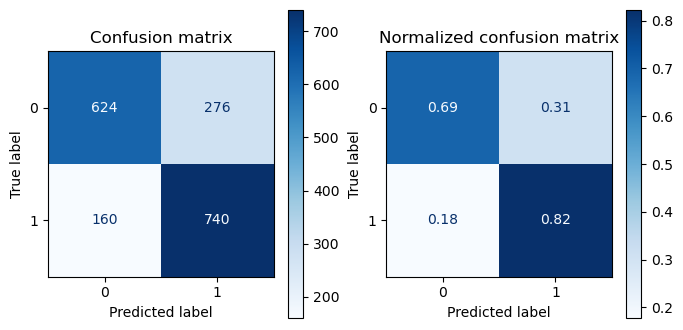

In [19]:
prediction = Binarizer(threshold=0.49053045757631125).fit_transform(prediction_prob_class1)
get_evaluation(y_test, prediction, grid_random_forest, X_test)

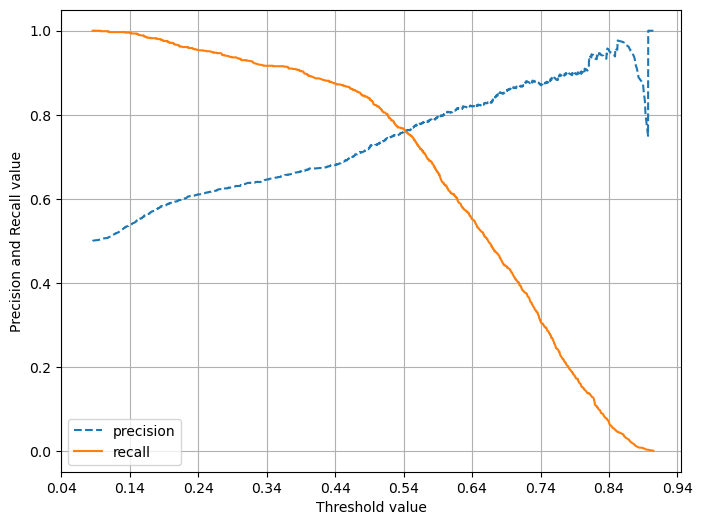

In [20]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, prediction_proba_class1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold, Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

# Predict probabilities using the grid_random_forest
precision_recall_curve_plot(y_test, grid_random_forest.predict_proba(X_test)[:, 1])


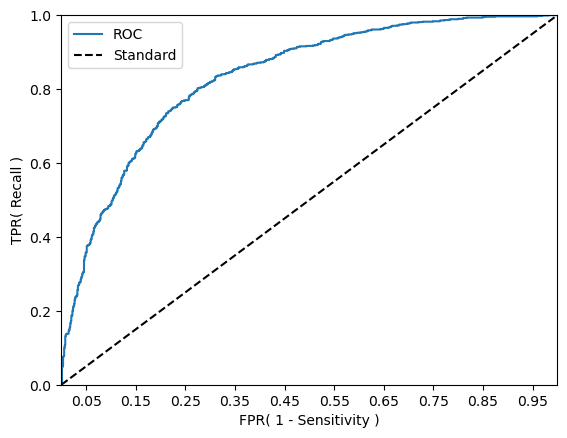

In [21]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , prediction_proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test ,prediction_proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, grid_random_forest.predict_proba(X_test)[:, 1] )